In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop, Adam, SGD
from sklearn.preprocessing import LabelEncoder

In [2]:
# Veri setinin olduğu dizin ve sınıf etiketlerini tanımlayın
dataset_dir = "C:/Users/hazalbolukbasi/Desktop/chest_xray"

class_labels = ["NORMAL", "PNEUMONIA"]
data=[]
labels=[]


In [3]:
# Train ve test veri setini yükleme
train_data="/Users/hazalbolukbasi/Desktop/chest_xray/train"
test_data="/Users/hazalbolukbasi/Desktop/chest_xray/test"

# Train veri setini yükleme
for class_label in class_labels:
    class_dir = os.path.join(train_data, class_label)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path).convert("RGB")
        image = image.resize((150, 150))
        image_array = np.array(image)
        data.append(image_array)
        labels.append(class_label)




In [4]:
# Test veri setini yükleme
for class_label in class_labels:
    class_dir = os.path.join(test_data, class_label)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path).convert("RGB")
        image = image.resize((150, 150))
        image_array = np.array(image)
        data.append(image_array)
        labels.append(class_label)


In [5]:
#'data_dir' dizinindeki veri setini yükleyen ve işleyen bir fonksiyon.
def load_data(data_dir):
    data = []
    labels = []
    class_labels = os.listdir(data_dir)

    for class_label in class_labels:
        class_dir = os.path.join(data_dir, class_label)
        if class_label == ".DS_Store":
            continue
        for image_name in os.listdir(class_dir):
            if image_name.endswith(".jpeg"):
                image_path = os.path.join(class_dir, image_name)
                image = Image.open(image_path).convert("RGB")
                image = image.resize((150, 150))
                image_array = np.array(image)
                data.append(image_array)
                labels.append(class_label)

    return np.array(data), np.array(labels)


In [6]:

# Train veri setini yükleyerek eğitim setlerini oluşturur
train_data_dir = "/Users/hazalbolukbasi/Desktop/chest_xray/train"
train_data, train_labels = load_data(train_data_dir)

# Test veri setini yükleyerek  test veri setlerini oluşturur
test_data_dir = "/Users/hazalbolukbasi/Desktop/chest_xray/test"
test_data, test_labels = load_data(test_data_dir)


In [8]:


# Etiketleri kategorik hale getir
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

train_labels_categorical = to_categorical(train_labels_encoded)
test_labels_categorical = to_categorical(test_labels_encoded)

# Veri setinin boyutunu kontrol et
print("Train veri seti boyutu:", train_data.shape)
print("Test veri seti boyutu:", test_data.shape)
print("Train etiket seti boyutu:", train_labels_categorical.shape)
print("Test etiket seti boyutu:", test_labels_categorical.shape)



Train veri seti boyutu: (5216, 150, 150, 3)
Test veri seti boyutu: (624, 150, 150, 3)
Train etiket seti boyutu: (5216, 2)
Test etiket seti boyutu: (624, 2)


In [16]:
# CNN modeli oluşturup derleme ve eğitme Model1 için
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(train_data, train_labels_categorical, epochs=10, batch_size=32)

Epoch 1/10
163/163 [==============================] - 68s 415ms/step - loss: 5.9072 - accuracy: 0.8825
Epoch 2/10
163/163 [==============================] - 67s 409ms/step - loss: 0.1197 - accuracy: 0.9555
Epoch 3/10
163/163 [==============================] - 76s 466ms/step - loss: 0.0932 - accuracy: 0.9663
Epoch 4/10
163/163 [==============================] - 78s 478ms/step - loss: 0.0800 - accuracy: 0.9697
Epoch 5/10
163/163 [==============================] - 78s 480ms/step - loss: 0.0660 - accuracy: 0.9766
Epoch 6/10
163/163 [==============================] - 81s 500ms/step - loss: 0.0590 - accuracy: 0.9799
Epoch 7/10
163/163 [==============================] - 81s 497ms/step - loss: 0.0549 - accuracy: 0.9812
Epoch 8/10
163/163 [==============================] - 80s 491ms/step - loss: 0.0471 - accuracy: 0.9852
Epoch 9/10
163/163 [==============================] - 80s 492ms/step - loss: 0.0411 - accuracy: 0.9883
Epoch 10/10
163/163 [==============================] - 79s 486ms/step - l

In [11]:
#Model2 için

model2 = Sequential()
model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(2, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_data, train_labels_categorical, epochs=10, batch_size=32)

Epoch 1/10
163/163 [==============================] - 175s 1s/step - loss: 100.1301 - accuracy: 0.7212
Epoch 2/10
163/163 [==============================] - 174s 1s/step - loss: 6.5299 - accuracy: 0.8338
Epoch 3/10
163/163 [==============================] - 173s 1s/step - loss: 0.4283 - accuracy: 0.8681
Epoch 4/10
163/163 [==============================] - 174s 1s/step - loss: 2.8743 - accuracy: 0.9057
Epoch 5/10
163/163 [==============================] - 184s 1s/step - loss: 0.4193 - accuracy: 0.9174
Epoch 6/10
163/163 [==============================] - 217s 1s/step - loss: 4.2470 - accuracy: 0.9294
Epoch 7/10
163/163 [==============================] - 248s 2s/step - loss: 4.4437 - accuracy: 0.9333
Epoch 8/10
163/163 [==============================] - 238s 1s/step - loss: 0.1896 - accuracy: 0.9452
Epoch 9/10
163/163 [==============================] - 238s 1s/step - loss: 0.2741 - accuracy: 0.9500
Epoch 10/10
163/163 [==============================] - 242s 1s/step - loss: 0.8485 - accu

In [12]:
#Model3 için
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(2, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(train_data, train_labels_categorical, epochs=10, batch_size=32)


Epoch 1/10
163/163 [==============================] - 94s 575ms/step - loss: 1.3240 - accuracy: 0.8733
Epoch 2/10
163/163 [==============================] - 99s 608ms/step - loss: 0.1144 - accuracy: 0.9597
Epoch 3/10
163/163 [==============================] - 100s 612ms/step - loss: 0.1063 - accuracy: 0.9599
Epoch 4/10
163/163 [==============================] - 101s 620ms/step - loss: 0.0702 - accuracy: 0.9745
Epoch 5/10
163/163 [==============================] - 84s 516ms/step - loss: 0.0519 - accuracy: 0.9787
Epoch 6/10
163/163 [==============================] - 92s 563ms/step - loss: 0.0579 - accuracy: 0.9795
Epoch 7/10
163/163 [==============================] - 95s 585ms/step - loss: 0.0530 - accuracy: 0.9808
Epoch 8/10
163/163 [==============================] - 88s 538ms/step - loss: 0.0396 - accuracy: 0.9850
Epoch 9/10
163/163 [==============================] - 91s 556ms/step - loss: 0.0372 - accuracy: 0.9875
Epoch 10/10
163/163 [==============================] - 94s 578ms/step -

In [17]:
# Model performansını değerlendirme
loss1, accuracy1 = model1.evaluate(test_data, test_labels_categorical)
loss2, accuracy2 = model2.evaluate(test_data, test_labels_categorical)
loss3, accuracy3 = model3.evaluate(test_data, test_labels_categorical)

print("Model 1 Test Loss:", loss1)
print("Model 1 Test Accuracy:", accuracy1)
print("Model 2 Test Loss:", loss2)
print("Model 2 Test Accuracy:", accuracy2)
print("Model 3 Test Loss:", loss3)
print("Model 3 Test Accuracy:", accuracy3)




20/20 [==============================] - 3s 154ms/step - loss: 1.9021 - accuracy: 0.7340
Model 1 Test Loss: 0.7734202742576599
Model 1 Test Accuracy: 0.7804487347602844
Model 2 Test Loss: 1.4855953454971313
Model 2 Test Accuracy: 0.7708333134651184
Model 3 Test Loss: 1.902065396308899
Model 3 Test Accuracy: 0.7339743375778198


In [14]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Örnek görüntüleri seçme
sample_images_normal = train_data[train_labels == 'NORMAL'][:5]
sample_images_pneumonia = train_data[train_labels == 'PNEUMONIA'][:5]

# Örnek etiketleri seçme
sample_labels_normal = train_labels[train_labels == 'NORMAL'][:5]
sample_labels_pneumonia = train_labels[train_labels == 'PNEUMONIA'][:5]

# Örnek görüntüleri ve etiketleri birleştirme
sample_images = np.concatenate([sample_images_normal, sample_images_pneumonia])
sample_labels = np.concatenate([sample_labels_normal, sample_labels_pneumonia])





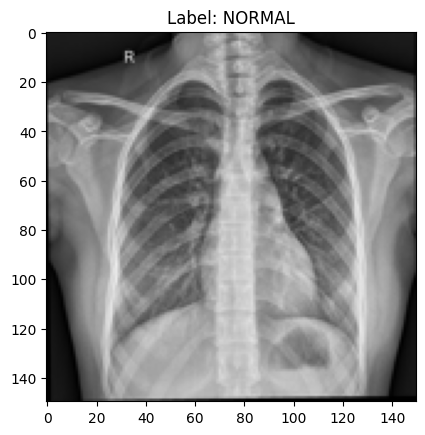

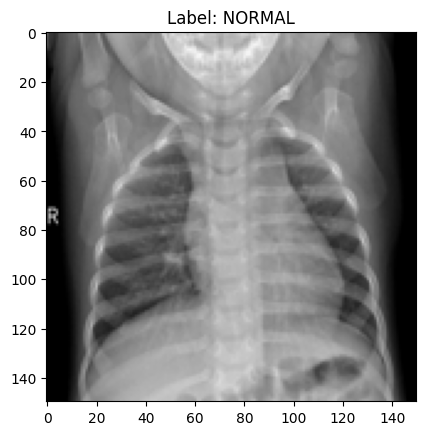

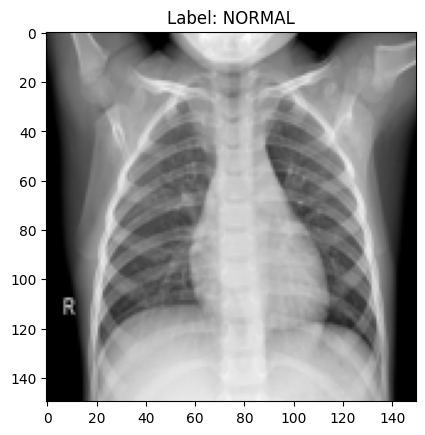

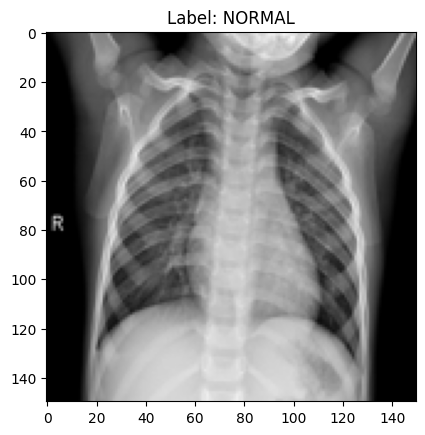

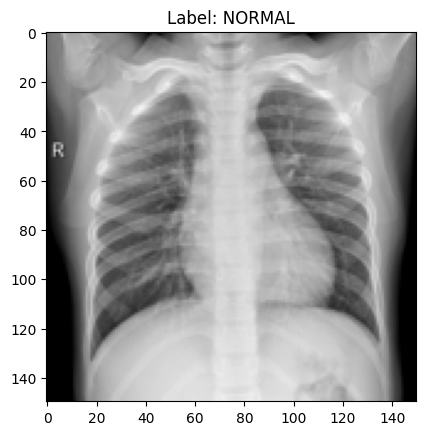

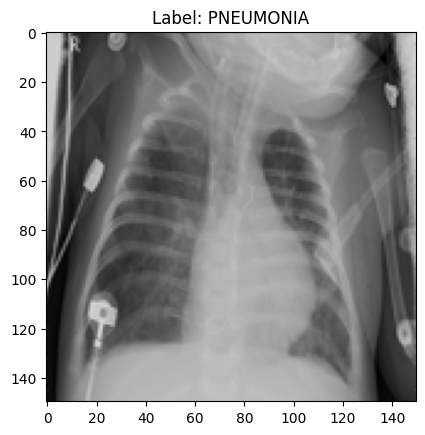

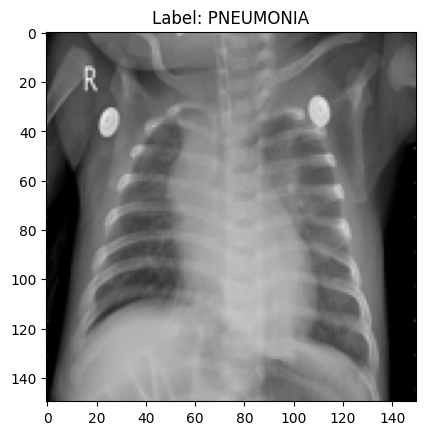

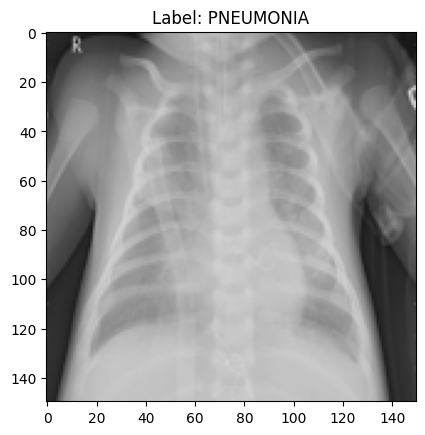

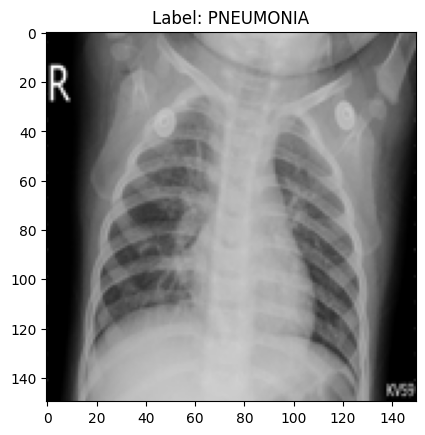

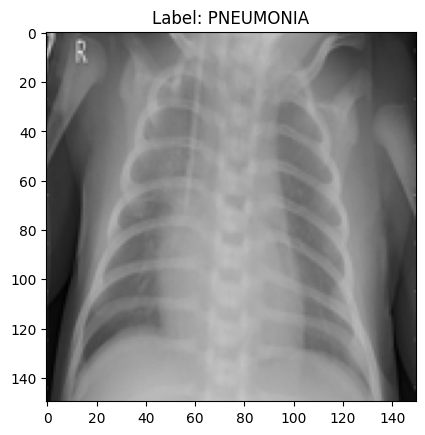

In [15]:
# Görüntüleri görselleştirme
for i in range(len(sample_images)):
    image = sample_images[i]
    label = sample_labels[i]
    plt.imshow(image)
    plt.title("Label: " + label)
    plt.show()